In [1]:
#Installing necessary libraries
!pip install matplotlib deap
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
#base: Contains basic classes to create and manipulate algorithms.
#creator: Helps define evolutionary algorithms by setting objectives and constraints.
#tools: Provides utilities for selection, mutation, crossover, etc.
#algorithms: Offers pre-defined algorithms for evolutionary computation


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 2.4 MB/s eta 0:00:00


In [2]:
#Define the number of locations and vehicles

num_locations = 20
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot =(50,50)
num_vehicles =3

In [3]:
# --- Define the fitness evaluation function (Task 5) ---
def calculate_distance(p1, p2):
    """Helper function to calculate Euclidean distance between two points."""
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [4]:
def evalVRP(individual):
    """Evaluates the total distance and workload balance (standard deviation)."""
    # Split individual into truck routes (based on number of vehicles)
    truck_routes = np.array_split(individual, num_vehicles)

    total_distance = 0
    truck_distances = []

    for route in truck_routes:
        distance = 0
        prev_location = depot

        # Calculate the distance for the route (from depot to locations and back)
        for idx in route:
            distance += calculate_distance(prev_location, locations[idx])
            prev_location = locations[idx]

        # Return to depot
        distance += calculate_distance(prev_location, depot)

        truck_distances.append(distance)
        total_distance += distance

    # Calculate the standard deviation of distances (workload balance)
    distance_std_dev = np.std(truck_distances)

    return total_distance, distance_std_dev

In [5]:
# --- Initialize the toolbox and register functions (Task 6) ---
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [6]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalVRP)

In [7]:
# --- Generate a population for testing ---
population_size = 50
population = toolbox.population(n=population_size)

In [8]:
# Evaluate the fitness of the first individual
individual = population[0]
total_distance, distance_std_dev = evalVRP(individual)

In [9]:
# --- Visualize the Routes and Workload Balance ---
def visualize_routes(individual):
    """Visualizes the routes taken by the trucks."""
    # Split individual into truck routes
    truck_routes = np.array_split(individual, num_vehicles)

    # Plot the locations and depot
    plt.figure(figsize=(10, 8))
    plt.scatter(*depot, color='red', label='Depot', zorder=5)

    # Colors for different trucks
    truck_colors = ['blue', 'green', 'orange']

    # Plot each truck's route
    for idx, route in enumerate(truck_routes):
        route_coords = [depot] + [locations[i] for i in route] + [depot]  # Include depot as start and end
        route_x, route_y = zip(*route_coords)

        plt.plot(route_x, route_y, marker='o', color=truck_colors[idx], label=f'Truck {idx + 1}')

    # Add labels and title
    plt.title(f"Truck Routes (Total Distance: {total_distance:.2f}, Std Dev: {distance_std_dev:.2f})")
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()

In [10]:
def visualize_workload_balance():
    """Visualizes the distribution of distances across trucks."""
    truck_routes = np.array_split(individual, num_vehicles)
    truck_distances = []

    for route in truck_routes:
        distance = 0
        prev_location = depot

        for idx in route:
            distance += calculate_distance(prev_location, locations[idx])
            prev_location = locations[idx]

        distance += calculate_distance(prev_location, depot)
        truck_distances.append(distance)

    # Plot the workload balance (distances per truck)
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, num_vehicles + 1), truck_distances, color='skyblue')
    plt.title('Workload Balance Across Trucks')
    plt.xlabel('Truck Number')
    plt.ylabel('Total Distance')
    plt.xticks(range(1, num_vehicles + 1))
    plt.grid(True)
    plt.show()

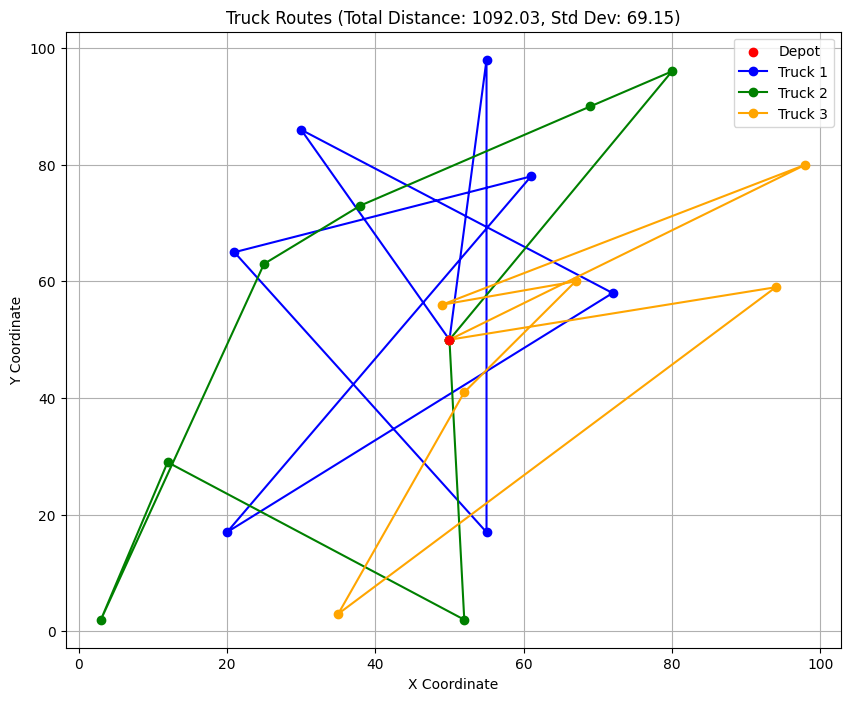

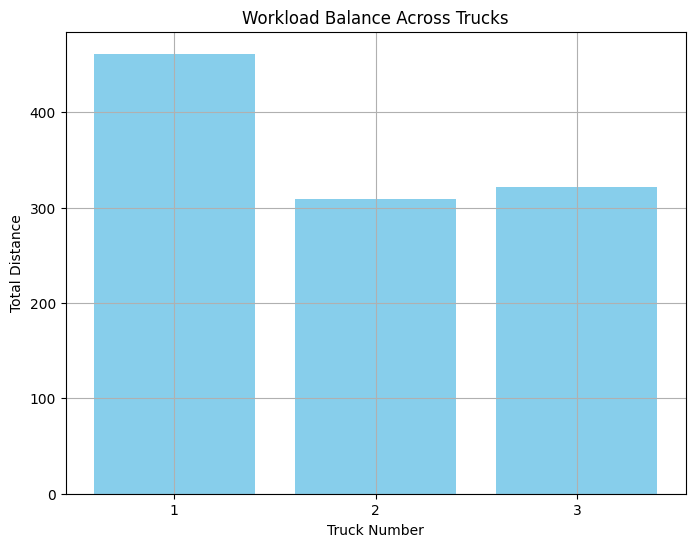

In [11]:
# --- Visualize the results ---
visualize_routes(individual)  # Visualize the routes
visualize_workload_balance()  # Visualize workload balance

In [12]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

In [13]:
# --- Initialize the toolbox and register functions (Task 6) ---
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalVRP)
# Register a selection operator (e.g., tournament selection)
toolbox.register("select", tools.selTournament, tournsize=3) # Added selection operator registration

# Register a crossover (mate) operator
# Example: Partially Matched Crossover (PMX)
toolbox.register("mate", tools.cxPartialyMatched)
# or toolbox.register("mate", tools.cxOrdered) #if you want to use Ordered Crossover

# Register a mutation operator
# Example: Shuffle mutation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg   	min    
0  	300   	589.44	5.54669
1  	213   	564.306	4.63868
2  	243   	552.803	3.39787
3  	232   	542.463	2.10439
4  	233   	538.466	3.37674
5  	218   	535.383	3.7121 
6  	213   	529.92 	5.17675
7  	233   	525.616	8.54317
8  	219   	521.916	3.3744 
9  	209   	507.7  	6.13059
10 	224   	509.469	6.63676
11 	230   	513.312	2.06933
12 	230   	510.937	2.06933
13 	217   	498.103	2.06933
14 	231   	502.184	3.44569
15 	250   	504.185	2.06933
16 	238   	502.476	5.29925
17 	236   	488.188	4.07566
18 	225   	484.467	4.78056
19 	225   	469.942	3.79225
20 	209   	453.618	4.38238
21 	232   	444.211	1.49625
22 	237   	443.919	1.99726
23 	217   	434.426	1.99726
24 	227   	420.454	1.60591
25 	246   	421.932	4.36565
26 	233   	418.849	3.86717
27 	219   	406.948	1.86386
28 	229   	396.391	5.92261
29 	223   	396.894	5.87314
30 	238   	391.231	3.10395
31 	225   	383.995	1.29721
32 	221   	381.945	1.29721
33 	243   	371.26 	3.60319
34 	232   	360.621	3.17909
35 	244   	352.636	1.20624
36 

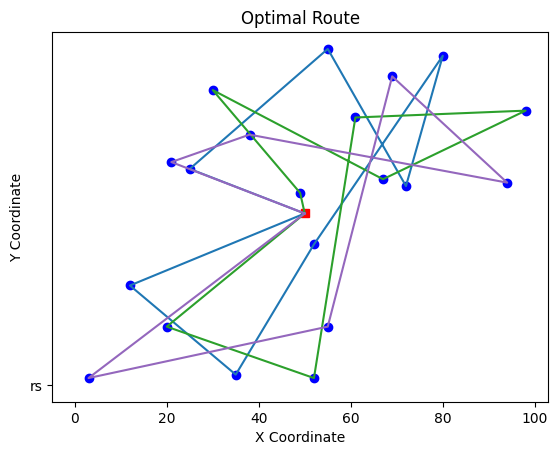

Best Individual: [16, 0, 5, 19, 13, 2, 14, 9, 12, 10, 11, 15, 18, 17, 7, 1, 8, 4, 6, 3]
Best Fitness (total distance, standard deviation): (470.19358505702144, 15.512785066816047)


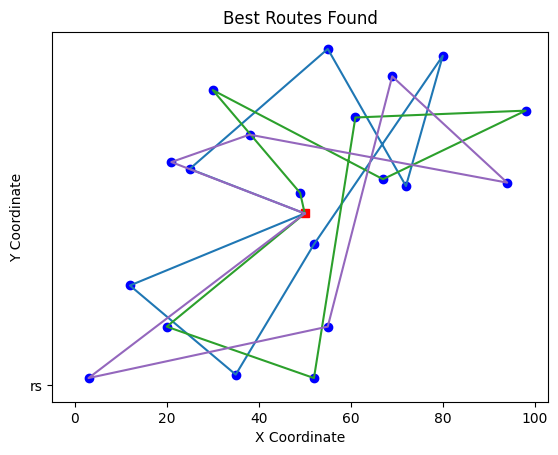

Statistics:


In [14]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    # Import the algorithms module from deap
    from deap import algorithms
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

# Change '_name_' to '__name__' to fix the condition
if __name__ == "__main__":
    # TODO: Task 9 - Call the main function, run the algorithm and print the results
    pop, stats, hof = main()

    # Print the best individual found
    best_individual = hof[0]
    print("Best Individual:", best_individual)

    # Evaluate the best individual
    best_fitness = toolbox.evaluate(best_individual)
    print("Best Fitness (total distance, standard deviation):", best_fitness)

    # Plot the routes for the best individual
    plot_routes(best_individual, title="Best Routes Found")

    # Print the statistics
    print("Statistics:")
    print(stats) # Correct the print statement to print the stats variable